<a href="https://colab.research.google.com/github/TarekHasan011/Pattern-Recognition/blob/main/KMeans_Pattern_Recognition_Lab_Offline3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reading Data

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('g_data.csv')

# Spliting Data

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.20)

In [ ]:
K_cluster = 10

In [ ]:
def mean(feature):
    answer = np.array([0]*feature.shape[1])
    for x in feature:
        answer = answer + x
    answer = answer / len(feature)
    return answer

In [ ]:
def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))

In [ ]:
def same(x,y):
    for i in range(len(x)):
        if x[i] == y[i]:
            continue
        return False
    return True

In [ ]:
import random

centers = []

def update_center(current_cluster,K,fit_test):
    centers.clear()
    for i in range(K):
        temp = []
        for j in range(len(current_cluster)):
            if current_cluster[j] == i:
                temp.append(fit_test[j].copy())
        temp = np.array(temp)
        centers.append(list(mean(temp)))

def plot_current_cluster(current_cluster):
    pca = PCA(n_components=2)
    train_plot = pd.DataFrame(pca.fit_transform(train))
    train_plot['cluster_index'] = pd.Series(current_cluster)
    train_plot.plot.scatter(x=0,y=1,c='cluster_index', colormap='jet')

def fit(K):
    fit_test = np.array(train).copy()
    current_cluster = np.array([])
    
    for i in range(len(fit_test)):
        current_cluster = np.append(current_cluster, random.randint(0,K-1))

    next_cluster = np.array([0]*len(fit_test))
    first_time = True
    
    while not same(current_cluster,next_cluster):
        if not first_time:
            current_cluster = next_cluster.copy()
        first_time = False

        update_center(current_cluster,K,fit_test)
        plot_current_cluster(current_cluster)

        for i in range(len(fit_test)):
            temp = fit_test[i].copy()
            closer_cluster = 0
            distance = np.inf
            for j in range(len(centers)):
                if euclidean_distance(temp,np.array(centers[j])) < distance:
                    distance = euclidean_distance(temp,np.array(centers[j]))
                    closer_cluster = j
            next_cluster[i] = closer_cluster
    

In [ ]:
def predict(feature):
    prediction = []
    temp = np.array(feature)
    for i in range(len(temp)):
        tt = temp[i].copy()
        closer_cluster = 0
        distance = np.inf
        for j in range(len(centers)):
            if euclidean_distance(tt,np.array(centers[j])) < distance:
                distance = euclidean_distance(tt,np.array(centers[j]))
                closer_cluster = j
        prediction.append(closer_cluster)
    predition = np.array(prediction)
    return prediction

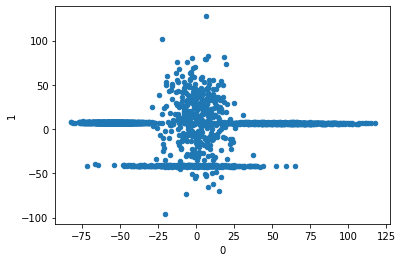

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_plot = pd.DataFrame(pca.fit_transform(train))
# plotting train data before training
train_plot.plot.scatter(x=0,y=1,colormap='jet')

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

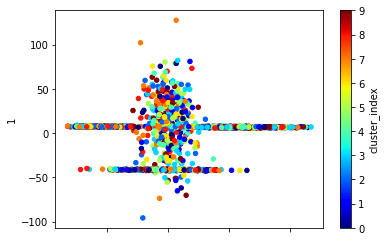

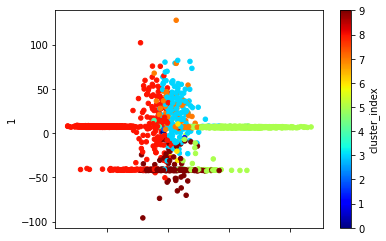

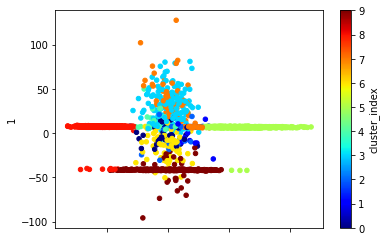

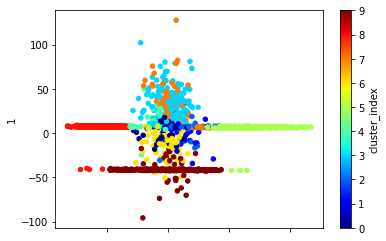

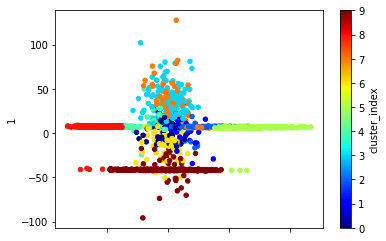

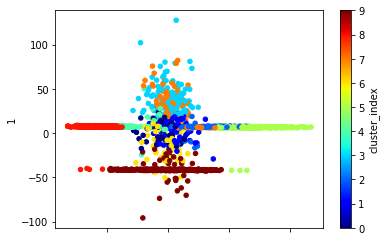

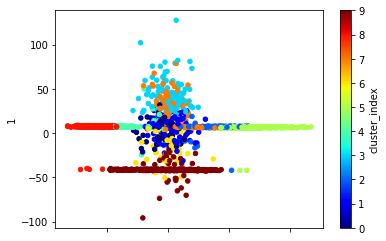

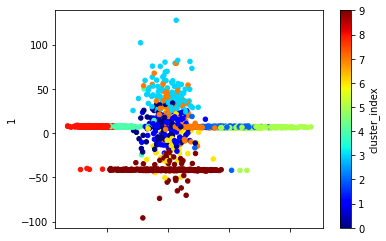

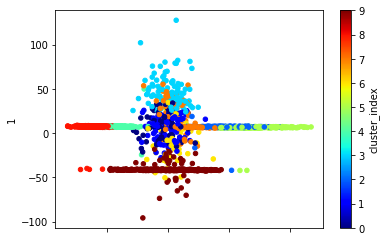

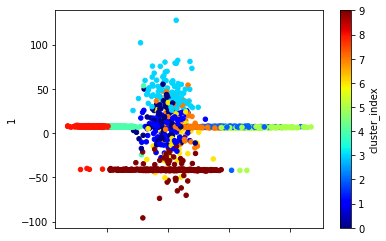

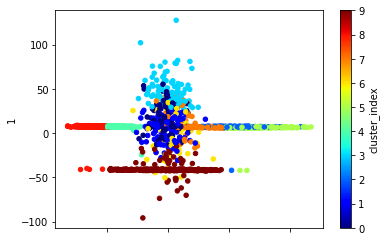

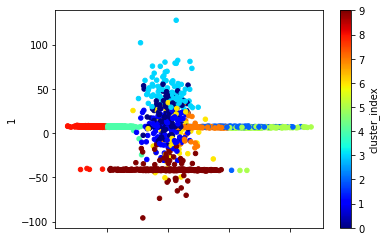

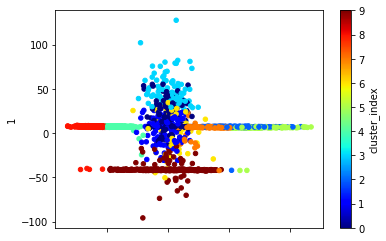

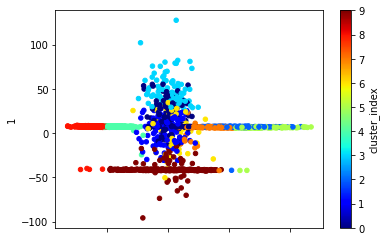

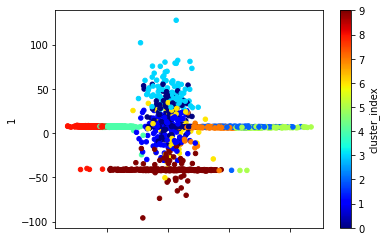

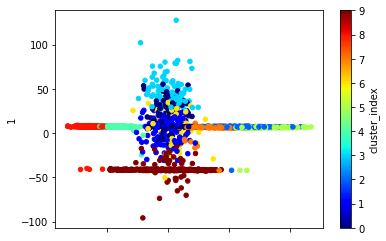

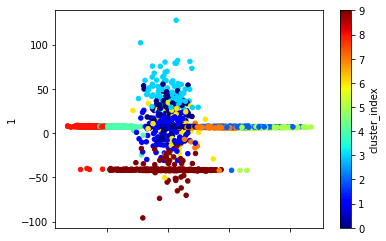

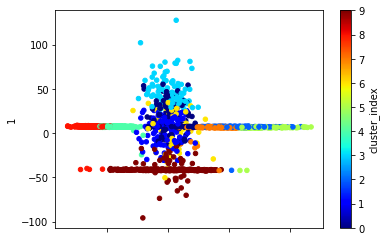

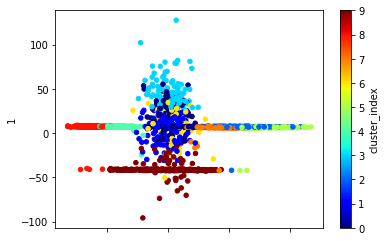

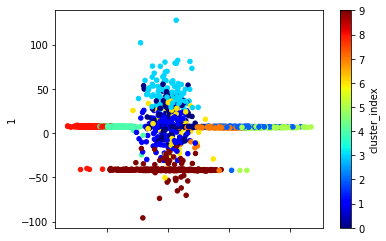

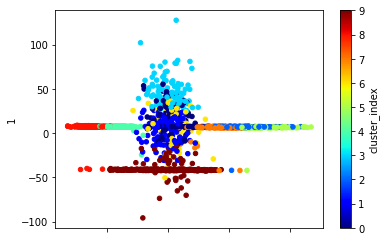

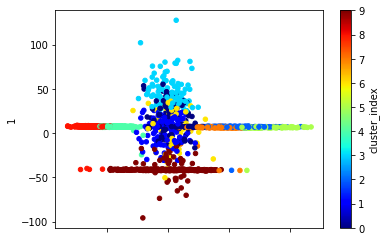

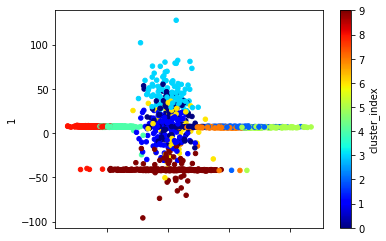

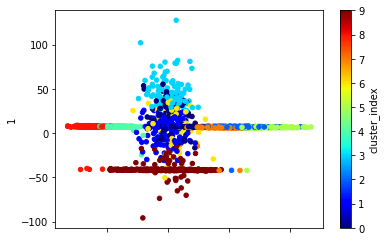

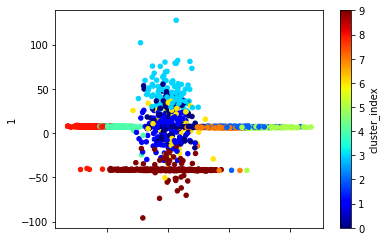

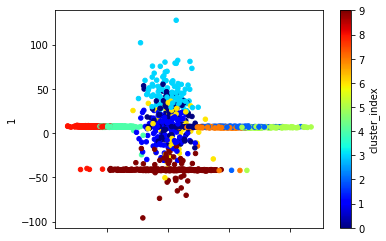

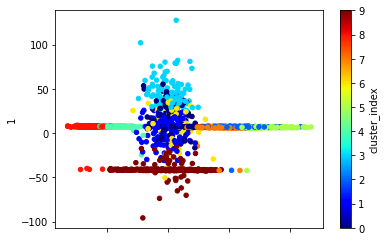

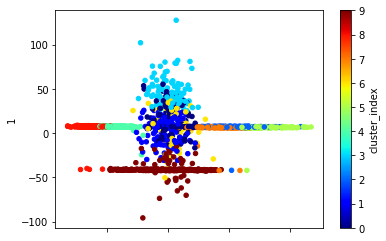

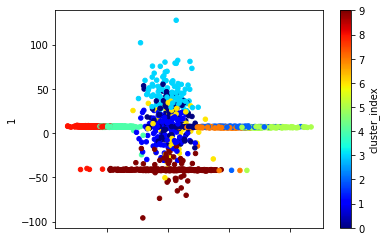

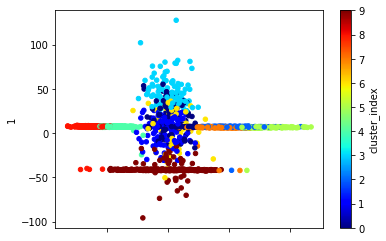

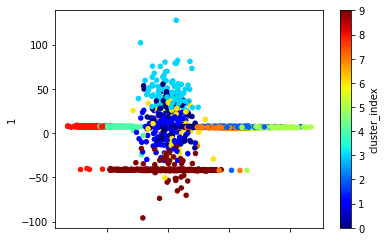

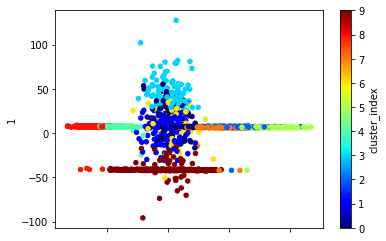

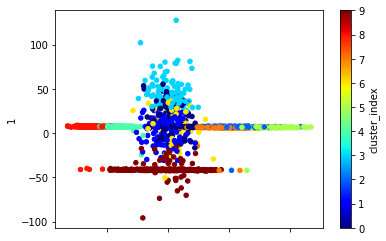

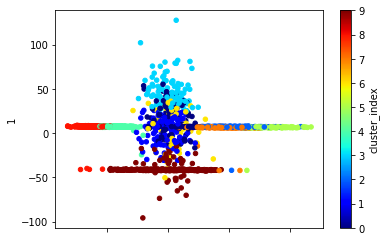

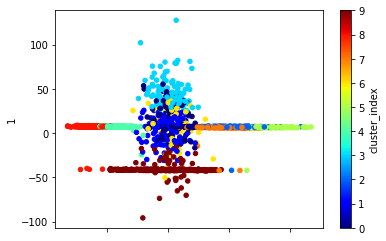

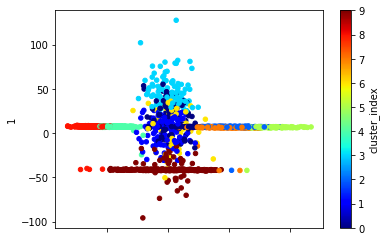

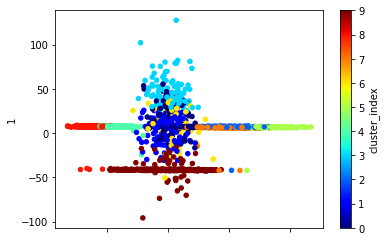

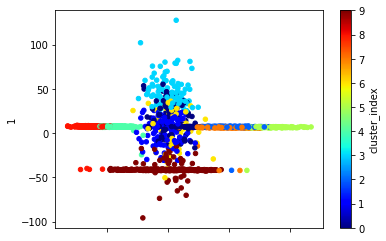

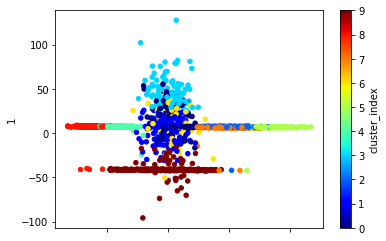

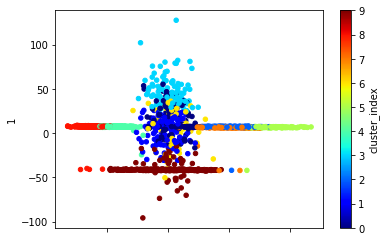

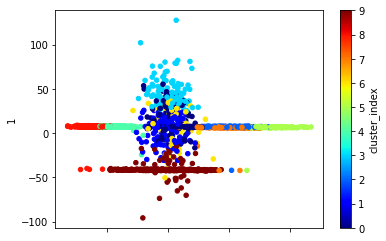

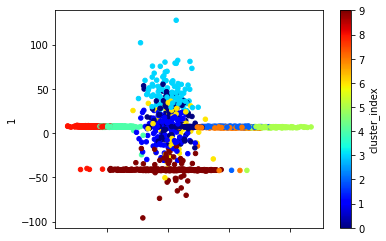

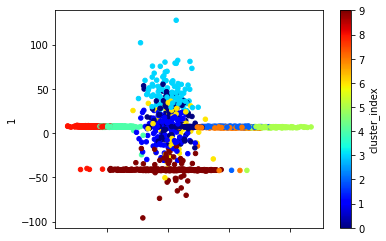

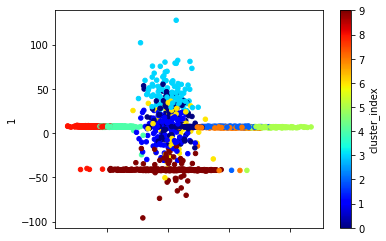

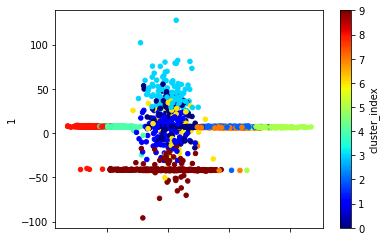

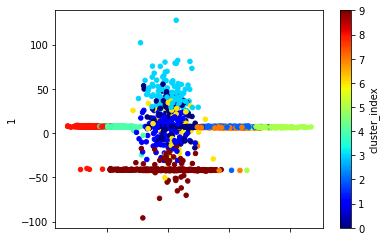

In [ ]:
fit(K_cluster)

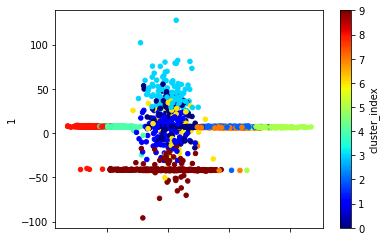

In [ ]:
prediction = predict(train)
train_plot = pd.DataFrame(pca.fit_transform(train))
train_plot['cluster_index'] = pd.Series(prediction)
# plotting train data after training
train_plot.plot.scatter(x=0,y=1,c='cluster_index', colormap='jet')

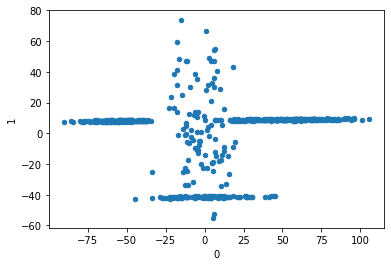

In [ ]:
test_plot = pd.DataFrame(pca.fit_transform(test))
test_plot.plot.scatter(x=0,y=1,colormap='jet')

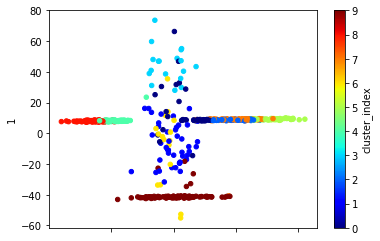

In [ ]:
prediction = predict(test)
test_plot = pd.DataFrame(pca.fit_transform(test))
test_plot['cluster_index'] = pd.Series(prediction)
test_plot.plot.scatter(x=0,y=1,c='cluster_index', colormap='jet')

# Using Sklearn

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA

def KMeans_sklearn(K):
    KM = KMeans(n_clusters=K, init='random')
    pca = PCA(n_components=2)
    train_plot = pd.DataFrame(pca.fit_transform(train))
    # plotting train data before training
    train_plot.plot.scatter(x=0,y=1,colormap='jet')

    KM.fit(train)
    prediction = KM.predict(train)
    train_plot = pd.DataFrame(pca.fit_transform(train))
    train_plot['cluster_index'] = pd.Series(prediction)
    # plotting train data after training
    train_plot.plot.scatter(x=0,y=1,c='cluster_index', colormap='jet')

    test_plot = pd.DataFrame(pca.fit_transform(test))
    # plotting test data before prediction
    test_plot.plot.scatter(x=0, y=1, colormap='jet')

    test_prediction = KM.predict(test)
    test_plot = pd.DataFrame(pca.fit_transform(test))
    test_plot['cluster_index'] = pd.Series(test_prediction)
    # plotting test data after prediction
    test_plot.plot.scatter(x=0, y=1, c='cluster_index', colormap='jet')


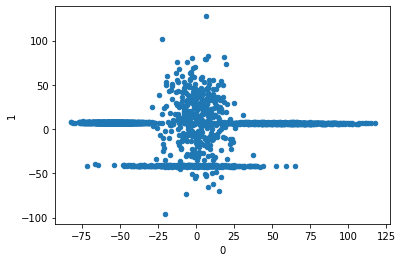

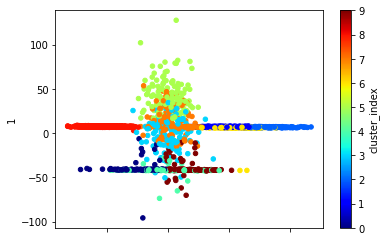

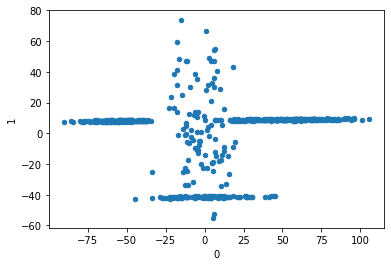

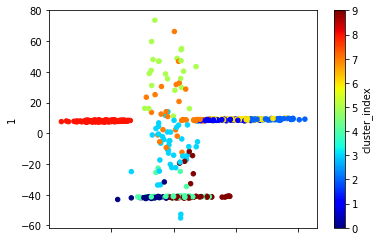

In [ ]:
KMeans_sklearn(K_cluster)